In [2]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(16,4))
plt.rc('font',size=12)


# CMB-S4 Description

# # https://indico.cmb-s4.org/event/3/attachments/5/51/PBDR_v0.1.pdf Page 80 (SAT)
# freqs = np.array([30., 40., 85., 145., 95., 155., 220., 270.])
# fwhm = np.array([72.8, 72.8, 25.5, 25.5, 22.7, 22.7, 13, 13])
# dnu_nu = np.array([0.3, 0.3, 0.24, 0.22, 0.24, 0.22, 0.22, 0.22])
# net = np.array([177., 224., 270., 309., 238., 331., 747., 1281.])  #muk.sqrt(s)
# ndet = np.array([576, 576, 21144, 21144, 21144, 21144, 33752, 33752])
# CMB-S4 - private comm from Josquin (unofficial)
#7 years - 12 tubes - nominal 3% sky coverage
freqs = np.array([20., 30., 40., 85., 95., 145., 155., 220., 270.])
bandwidth = np.array([5., 9., 12., 20.4, 22.8, 31.9, 34.1, 48.4, 59.4])
dnu_nu = bandwidth/freqs
beam_fwhm = np.array([11., 72.8, 72.8, 25.5, 25.5, 22.7, 22.7, 13., 13.])
mukarcmin_TT = np.array([16.5, 9.36, 11.85, 2.02, 1.78, 3.89, 4.16, 10.15, 17.4])
mukarcmin_EE = np.array([10.87, 6.2, 7.85, 1.34, 1.18, 1.8, 1.93, 4.71, 8.08])
mukarcmin_BB = np.array([10.23, 5.85, 7.4, 1.27, 1.12, 1.76, 1.89, 4.6, 7.89])
ell_min = np.array([30, 30, 30, 30, 30, 30, 30, 30, 30])
nside = np.array([512, 512, 512, 512, 512, 512, 512, 512, 512])
edges_min = freqs * (1. - dnu_nu/2)
edges_max = freqs * (1. + dnu_nu/2)
edges = [[edges_min[i], edges_max[i]] for i in range(len(freqs))]
s4_config = {
    'nbands': len(freqs),
    'frequency': freqs,
    'depth_p': 0.5*(mukarcmin_EE + mukarcmin_BB),
    'depth_i': mukarcmin_TT,
    'depth_e': mukarcmin_EE,
    'depth_b': mukarcmin_BB,
    'fwhm': beam_fwhm,
    'bandwidth': bandwidth,
    'dnu_nu': dnu_nu,
    'ell_min': ell_min,
    'nside': nside,
    'fsky': 0.03,
    'ntubes': 12,
    'nyears': 7.,
    'edges': edges,
    'effective_fraction': np.zeros(len(freqs))+1.
            }

nbands: 9
frequency: [ 20.  30.  40.  85.  95. 145. 155. 220. 270.]
depth_p: [10.55   6.025  7.625  1.305  1.15   1.78   1.91   4.655  7.985]
depth_i: [16.5   9.36 11.85  2.02  1.78  3.89  4.16 10.15 17.4 ]
depth_e: [10.87  6.2   7.85  1.34  1.18  1.8   1.93  4.71  8.08]
depth_b: [10.23  5.85  7.4   1.27  1.12  1.76  1.89  4.6   7.89]
fwhm: [11.  72.8 72.8 25.5 25.5 22.7 22.7 13.  13. ]
bandwidth: [ 5.   9.  12.  20.4 22.8 31.9 34.1 48.4 59.4]
dnu_nu: [0.25 0.3  0.3  0.24 0.24 0.22 0.22 0.22 0.22]
ell_min: [30 30 30 30 30 30 30 30 30]
nside: [512 512 512 512 512 512 512 512 512]
fsky: 0.03
ntubes: 12
nyears: 7.0
edges: [[17.5, 22.5], [25.5, 34.5], [34.0, 46.0], [74.8, 95.2], [83.6, 106.4], [129.05, 160.95000000000002], [137.95, 172.05], [195.8, 244.20000000000002], [240.3, 299.70000000000005]]
effective_fraction: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


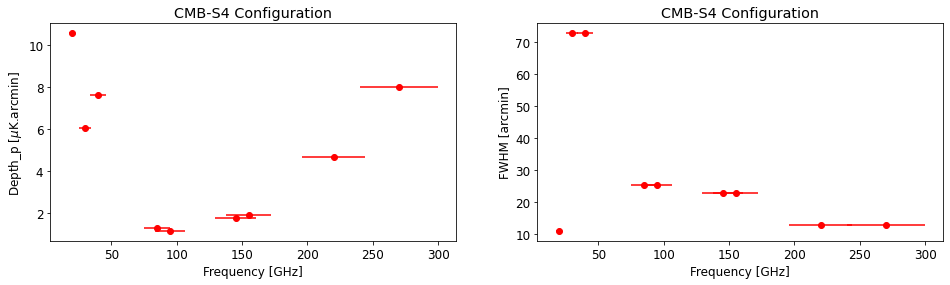

In [3]:
plt.figure()
for k in s4_config.keys():
    print('{}: {}'.format(k,s4_config[k]))
plt.subplot(1,2,1)
plt.errorbar(s4_config['frequency'], s4_config['depth_p'], xerr=s4_config['bandwidth']/2, fmt='ro')
plt.xlabel('Frequency [GHz]')
plt.ylabel(r'Depth_p [$\mu$K.arcmin]')
plt.title('CMB-S4 Configuration')
plt.subplot(1,2,2)
plt.errorbar(s4_config['frequency'], s4_config['fwhm'], xerr=s4_config['bandwidth']/2, fmt='ro')
plt.xlabel('Frequency [GHz]')
plt.ylabel('FWHM [arcmin]')
plt.title('CMB-S4 Configuration')
plt.show()

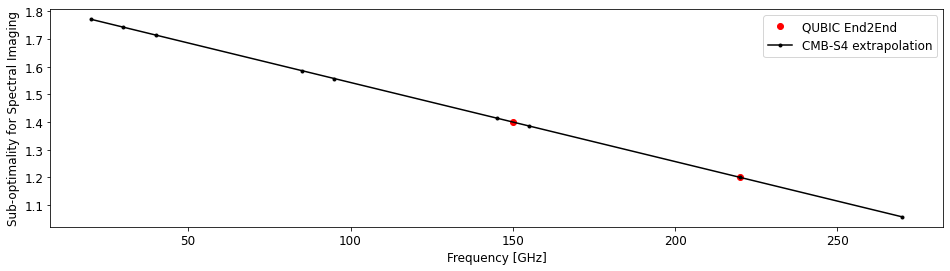

In [4]:
### QUBIC Sub-optimality : values from Louise Mousset's PhD thesis
def fct_subopt(nus):
    subnus = [150., 220]
    subval = [1.4, 1.2]
    fct_subopt = np.poly1d(np.polyfit(subnus, subval, 1))
    return fct_subopt(nus)

subnus = [150., 220]
subval = [1.4, 1.2]

plt.figure()
plt.plot(subnus, subval, 'ro',label='QUBIC End2End')
plt.plot(s4_config['frequency'], fct_subopt(s4_config['frequency']),'k.-', label='CMB-S4 extrapolation')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Sub-optimality for Spectral Imaging')
plt.legend()
plt.show()

In [5]:
def qubicify(config, qp_nsubs, qp_effective_fraction):
    nbands = np.sum(qp_nsubs)
    qp_config = config.copy()
    for k in qp_config.keys():
        qp_config[k]=[]
    qp_config['nbands'] = nbands
    qp_config['fsky'] = config['fsky']
    qp_config['ntubes'] = config['ntubes']
    qp_config['nyears'] = config['nyears']
    qp_config['initial_band'] = []
    
    for i in range(len(config['frequency'])):
        #print(config['edges'][i][0], config['edges'][i][-1])
        newedges = np.linspace(config['edges'][i][0], config['edges'][i][-1], qp_nsubs[i]+1)
        #print(newedges)
        newfreqs = (newedges[0:-1]+newedges[1:])/2
        newbandwidth = newedges[1:] - newedges[0:-1]
        newdnu_nu = newbandwidth / newfreqs
        newfwhm = config['fwhm'][i] * config['frequency'][i]/newfreqs
        scalefactor_noise = np.sqrt(qp_nsubs[i]) * fct_subopt(config['frequency'][i]) / qp_effective_fraction[i]
        newdepth_p = config['depth_p'][i] * np.ones(qp_nsub[i]) * scalefactor_noise
        newdepth_i = config['depth_i'][i] * np.ones(qp_nsub[i]) * scalefactor_noise
        newdepth_e = config['depth_e'][i] * np.ones(qp_nsub[i]) * scalefactor_noise
        newdepth_b = config['depth_b'][i] * np.ones(qp_nsub[i]) * scalefactor_noise
        newell_min = np.ones(qp_nsub[i]) * config['ell_min'][i]
        newnside = np.ones(qp_nsub[i]) * config['nside'][i]
        neweffective_fraction = np.ones(qp_nsub[i]) * qp_effective_fraction[i]
        initial_band = np.ones(qp_nsub[i]) * config['frequency'][i]
        
        for k in range(qp_nsubs[i]):
            if qp_effective_fraction[i] != 0:
                qp_config['frequency'].append(newfreqs[k])
                qp_config['depth_p'].append(newdepth_p[k])
                qp_config['depth_i'].append(newdepth_i[k])
                qp_config['depth_e'].append(newdepth_e[k])
                qp_config['depth_b'].append(newdepth_b[k])
                qp_config['fwhm'].append(newfwhm[k])
                qp_config['bandwidth'].append(newbandwidth[k])
                qp_config['dnu_nu'].append(newdnu_nu[k])
                qp_config['ell_min'].append(newell_min[k])
                qp_config['nside'].append(newnside[k])
                
                qp_config['effective_fraction'].append(neweffective_fraction[k])
                qp_config['initial_band'].append(initial_band[k])
        for k in range(qp_nsubs[i]+1):
            if qp_effective_fraction[i] != 0:
                qp_config['edges'].append(newedges[k])
    fields = ['frequency', 'depth_p', 'depth_i', 'depth_e', 'depth_b', 'fwhm', 'bandwidth', 
              'dnu_nu', 'ell_min', 'nside', 'edges', 'effective_fraction', 'initial_band']
    for j in range(len(fields)):
        qp_config[fields[j]] = np.array(qp_config[fields[j]])
        
    return qp_config

[ 20.    30.    40.    76.84  80.92  85.    89.08  93.16  85.88  90.44
  95.    99.56 104.12 132.24 138.62 145.   151.38 157.76 141.36 148.18
 155.   161.82 168.64 200.64 210.32 220.   229.68 239.36 246.24 258.12
 270.   281.88 293.76]
[10.55        6.025       7.625       4.62722324  4.62722324  4.62722324
  4.62722324  4.62722324  4.00415887  4.00415887  4.00415887  4.00415887
  4.00415887  5.62914141  5.62914141  5.62914141  5.62914141  5.62914141
  5.91823306  5.91823306  5.91823306  5.91823306  5.91823306 12.49067572
 12.49067572 12.49067572 12.49067572 12.49067572 18.87528867 18.87528867
 18.87528867 18.87528867 18.87528867]
[ 5.    9.   12.    4.08  4.08  4.08  4.08  4.08  4.56  4.56  4.56  4.56
  4.56  6.38  6.38  6.38  6.38  6.38  6.82  6.82  6.82  6.82  6.82  9.68
  9.68  9.68  9.68  9.68 11.88 11.88 11.88 11.88 11.88]
[ 17.5   22.5   25.5   34.5   34.    46.    74.8   78.88  82.96  87.04
  91.12  95.2   83.6   88.16  92.72  97.28 101.84 106.4  129.05 135.43
 141.81 148.19 15

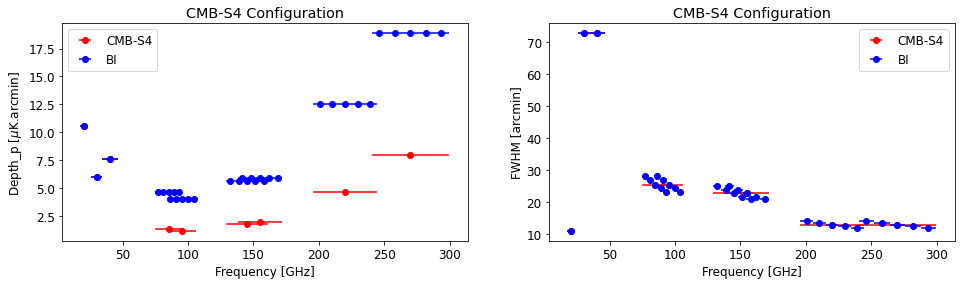

In [17]:
qp_nsub = np.array([1, 1, 1, 5, 5, 5, 5, 5, 5])
qp_effective_fraction = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
qp_config = qubicify(s4_config, qp_nsub, qp_effective_fraction)

#Corrected depths
qp_config['depth_p'][:3] = s4_config['depth_p'][:3]
qp_config['depth_i'][:3] = s4_config['depth_i'][:3]


print(qp_config['frequency'])
print(qp_config['depth_p'])
print(qp_config['bandwidth'])
print(qp_config['edges'])

plt.figure()
plt.subplot(1,2,1)
plt.errorbar(s4_config['frequency'], s4_config['depth_p'], xerr=s4_config['bandwidth']/2, fmt='ro', label='CMB-S4')
plt.errorbar(qp_config['frequency'], qp_config['depth_p'], xerr=qp_config['bandwidth']/2, fmt='bo', label='BI')
plt.xlabel('Frequency [GHz]')
plt.ylabel(r'Depth_p [$\mu$K.arcmin]')
plt.title('CMB-S4 Configuration')
plt.legend()
plt.subplot(1,2,2)
plt.errorbar(s4_config['frequency'], s4_config['fwhm'], xerr=s4_config['bandwidth']/2, fmt='ro', label='CMB-S4')
plt.errorbar(qp_config['frequency'], qp_config['fwhm'], xerr=qp_config['bandwidth']/2, fmt='bo', label='BI')
plt.xlabel('Frequency [GHz]')
plt.ylabel('FWHM [arcmin]')
plt.title('CMB-S4 Configuration')
plt.legend()
plt.show()

In [7]:
import pickle

#output = open('BI_dict.pkl', 'wb')
#pickle.dump(qp_config, output)
#output.close()

#output = open('S4_dict.pkl', 'wb')
#pickle.dump(s4_config, output)
#output.close()

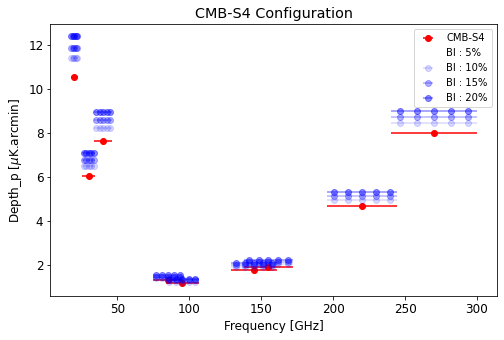

In [28]:
# MC

def give_me_frac(percent, nsub):
    fraction = np.ones(9)
    for i in range(9):
        frac = np.linspace(1,  np.sqrt(nsub)*fct_subopt(s4_config['frequency'][i]), 101)[::-1]
        #print(frac[percent])
        fraction[i] = frac[percent]
    #print(fraction)
    return fraction
qp_config_all=[]

tab_per = [5, 10, 15, 20]

for indper, per in enumerate(tab_per):
    qp_nsub = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5])
    qp_effective_fraction = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1.])*give_me_frac(per, 5)
    qp_config = qubicify(s4_config, qp_nsub, qp_effective_fraction)
    qp_config_all.append(qp_config)
#print(qp_config['frequency'])
#print(qp_config['depth_p'])
#print(qp_config['bandwidth'])
#print(qp_config['edges'])

plt.figure(figsize=(8, 5))
plt.subplot(1,1,1)
plt.errorbar(s4_config['frequency'], s4_config['depth_p'], xerr=s4_config['bandwidth']/2, fmt='ro', label='CMB-S4')
for i in range(len(tab_per)):
    plt.errorbar(qp_config_all[i]['frequency'], qp_config_all[i]['depth_p'], xerr=qp_config_all[i]['bandwidth']/2, alpha = 0.5*(i*0.3), fmt='bo', label='BI : {}%'.format(tab_per[i]))
plt.xlabel('Frequency [GHz]')
plt.ylabel(r'Depth_p [$\mu$K.arcmin]')
plt.title('CMB-S4 Configuration')
plt.legend(loc='best', fontsize=10)
plt.show()